In [161]:
import os
import json
import jsonlines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
BASE_DIR = "/home/ubuntu/vishalk/litellm/AgentBench/outputs/"
DBBENCH = 'dbbench-std'
WEBSHOP = 'webshop-std'
OSS = 'os-std'
M2W = 'm2w-std'

In [163]:
def load_overall_json(path):
    with open(path, 'r') as f:
        return json.load(f)

def load_runs_jsonl(path):
    data = []
    with jsonlines.open(path) as reader:
        for obj in reader:
            data.append(obj)
    return data

def load_results(base_dir):
    results = {}
    for caching_type in ['withCaching1', 'withoutCaching1', 'withShareGPT', 'shareGPT10']:
        caching_path = os.path.join(base_dir, caching_type)
        if not os.path.isdir(caching_path):
            continue

        results[caching_type] = {}

        for org_name in os.listdir(caching_path):
            org_path = os.path.join(caching_path, org_name)
            if not os.path.isdir(org_path):
                continue

            results[caching_type][org_name] = {}

            for model_name in os.listdir(org_path):
                model_path = os.path.join(org_path, model_name)
                if not os.path.isdir(model_path):
                    continue

                results[caching_type][org_name][model_name] = {}

                for task_name in os.listdir(model_path):
                    task_path = os.path.join(model_path, task_name)
                    overall_path = os.path.join(task_path, 'overall.json')
                    runs_path = os.path.join(task_path, 'runs.jsonl')

                    if os.path.exists(overall_path) and os.path.exists(runs_path):
                        results[caching_type][org_name][model_name][task_name] = {
                            'overall': load_overall_json(overall_path),
                            'runs': load_runs_jsonl(runs_path)
                        }

    return results




In [164]:
values = load_results(BASE_DIR)

In [165]:
results_caching = values["withCaching1"]["deepseek-ai"]["DeepSeek-R1-Distill-Qwen-14B"]
results_without_caching = values["withoutCaching1"]["deepseek-ai"]["DeepSeek-R1-Distill-Qwen-14B"]
results_with_sharegpt = values["withShareGPT"]["deepseek-ai"]["DeepSeek-R1-Distill-Qwen-14B"]
results_with_sharegpt_10 = values["shareGPT10"]["deepseek-ai"]["DeepSeek-R1-Distill-Qwen-14B"]

In [166]:
DBBENCH_DURATION_CACHED = results_caching[DBBENCH]["overall"]["duration_seconds"]
OSS_DURATION_CACHED = results_caching[OSS]["overall"]["duration_seconds"]
M2W_DURATION_CACHED = results_caching[M2W]["overall"]["duration_seconds"]
WEBSHOP_DURATION_CACHED = results_caching[WEBSHOP]["overall"]["duration_seconds"]

In [167]:
DBBENCH_DURATION_UNCACHED = results_without_caching[DBBENCH]["overall"]["duration_seconds"]
OSS_DURATION_UNCACHED = results_without_caching[OSS]["overall"]["duration_seconds"]
M2W_DURATION_UNCACHED = results_without_caching[M2W]["overall"]["duration_seconds"]
WEBSHOP_DURATION_UNCACHED = results_without_caching[WEBSHOP]["overall"]["duration_seconds"]

In [168]:
DBBENCH_DURATION_SHAREGPT = results_with_sharegpt[DBBENCH]["overall"]["duration_seconds"]
OSS_DURATION_SHAREGPT = results_with_sharegpt[OSS]["overall"]["duration_seconds"]
M2W_DURATION_SHAREGPT = results_with_sharegpt[M2W]["overall"]["duration_seconds"]
WEBSHOP_DURATION_SHAREGPT = results_with_sharegpt[WEBSHOP]["overall"]["duration_seconds"]

In [169]:
DBBENCH_DURATION_SHAREGPT10 = results_with_sharegpt_10[DBBENCH]["overall"]["duration_seconds"]
OSS_DURATION_SHAREGPT10 = results_with_sharegpt_10[OSS]["overall"]["duration_seconds"]
M2W_DURATION_SHAREGPT10 = results_with_sharegpt_10[M2W]["overall"]["duration_seconds"]
WEBSHOP_DURATION_SHAREGPT10 = results_with_sharegpt_10[WEBSHOP]["overall"]["duration_seconds"]

In [170]:
duration_df = pd.DataFrame({
    "Task": ["DBBench", "OSS", "M2W", "Webshop"],
    "Cached": [DBBENCH_DURATION_CACHED, OSS_DURATION_CACHED, M2W_DURATION_CACHED, WEBSHOP_DURATION_CACHED],
    "Uncached": [DBBENCH_DURATION_UNCACHED, OSS_DURATION_UNCACHED, M2W_DURATION_UNCACHED, WEBSHOP_DURATION_UNCACHED],
    "ShareGPT": [DBBENCH_DURATION_SHAREGPT, OSS_DURATION_SHAREGPT, M2W_DURATION_SHAREGPT, WEBSHOP_DURATION_SHAREGPT],
    "ShareGPT10": [DBBENCH_DURATION_SHAREGPT10, OSS_DURATION_SHAREGPT10, M2W_DURATION_SHAREGPT10, WEBSHOP_DURATION_SHAREGPT10]
})
# duration_df["difference"] = duration_df["Uncached"] - duration_df["Cached"]
# duration_df["percentage"] = (duration_df["difference"] / duration_df["Uncached"]) * 100
# duration_df["percentage"] = duration_df["percentage"].round(2)
duration_df


,Task,Cached,Uncached,ShareGPT,ShareGPT10
0,DBBench,1545.25,1663.32,2214.53,1704.69
1,OSS,311.72,289.91,330.42,327.51
2,M2W,387.94,409.89,410.16,385.49
3,Webshop,1212.33,1442.02,1500.32,1412.81


In [171]:
DBBENCH_RUNS_CACHED = results_caching[DBBENCH]["runs"]
OSS_RUNS_CACHED = results_caching[OSS]["runs"]
M2W_RUNS_CACHED = results_caching[M2W]["runs"]
WEBSHOP_RUNS_CACHED = results_caching[WEBSHOP]["runs"]

In [172]:
DBBENCH_RUNS_UNCACHED = results_without_caching[DBBENCH]["runs"]
OSS_RUNS_UNCACHED = results_without_caching[OSS]["runs"]
M2W_RUNS_UNCACHED = results_without_caching[M2W]["runs"]
WEBSHOP_RUNS_UNCACHED = results_without_caching[WEBSHOP]["runs"]

In [173]:
DBBENCH_RUNS_SHAREGPT = results_with_sharegpt[DBBENCH]["runs"]
OSS_RUNS_SHAREGPTD = results_with_sharegpt[OSS]["runs"]
M2W_RUNS_SHAREGPTD = results_with_sharegpt[M2W]["runs"]
WEBSHOP_RUNS_SHAREGPT = results_with_sharegpt[WEBSHOP]["runs"]

In [174]:
DBBENCH_RUNS_SHAREGPT10 = results_with_sharegpt_10[DBBENCH]["runs"]
OSS_RUNS_SHAREGPT10 = results_with_sharegpt_10[OSS]["runs"]
M2W_RUNS_SHAREGPT10 = results_with_sharegpt_10[M2W]["runs"]
WEBSHOP_RUNS_SHAREGPT10 = results_with_sharegpt_10[WEBSHOP]["runs"]

In [175]:
DBBENCH_RUNS_CACHED[0].keys()
# DBBENCH_RUNS_CACHED[0]['output']['history']

dict_keys(['index', 'error', 'info', 'output', 'time'])

In [176]:
DBBENCH_SUCCESS_RUNS_CACHED = [x for x in DBBENCH_RUNS_CACHED if x["output"]["status"] == "completed"]
OSS_SUCCESS_RUNS_CACHED = [x for x in OSS_RUNS_CACHED if x["output"]["status"] == "completed"]
M2W_SUCCESS_RUNS_CACHED = [x for x in M2W_RUNS_CACHED if x["output"]["status"] == "completed"]
WEBSHOP_SUCCESS_RUNS_CACHED = [x for x in WEBSHOP_RUNS_CACHED if x["output"]["status"] == "completed"]

DBBENCH_SUCCESS_RUNS_UNCACHED = [x for x in DBBENCH_RUNS_UNCACHED if x["output"]["status"] == "completed"]
OSS_SUCCESS_RUNS_UNCACHED = [x for x in OSS_RUNS_UNCACHED if x["output"]["status"] == "completed"]
M2W_SUCCESS_RUNS_UNCACHED = [x for x in M2W_RUNS_UNCACHED if x["output"]["status"] == "completed"]
WEBSHOP_SUCCESS_RUNS_UNCACHED = [x for x in WEBSHOP_RUNS_UNCACHED if x["output"]["status"] == "completed"]

DBBENCH_SUCCESS_RUNS_SHAREGPT = [x for x in DBBENCH_RUNS_SHAREGPT if x["output"]["status"] == "completed"]
OSS_SUCCESS_RUNS_SHAREGPT = [x for x in OSS_RUNS_SHAREGPTD if x["output"]["status"] == "completed"]
M2W_SUCCESS_RUNS_SHAREGPT = [x for x in M2W_RUNS_SHAREGPTD if x["output"]["status"] == "completed"]
WEBSHOP_SUCCESS_RUNS_SHAREGPT = [x for x in WEBSHOP_RUNS_SHAREGPT if x["output"]["status"] == "completed"]

DBBENCH_SUCCESS_RUNS_SHAREGPT10 = [x for x in DBBENCH_RUNS_SHAREGPT if x["output"]["status"] == "completed"]
OSS_SUCCESS_RUNS_SHAREGPT10 = [x for x in OSS_RUNS_SHAREGPTD if x["output"]["status"] == "completed"]
M2W_SUCCESS_RUNS_SHAREGPT10 = [x for x in M2W_RUNS_SHAREGPTD if x["output"]["status"] == "completed"]
WEBSHOP_SUCCESS_RUNS_SHAREGPT10 = [x for x in WEBSHOP_RUNS_SHAREGPT if x["output"]["status"] == "completed"]

In [177]:
parsed_df = []
list_of_runs = [DBBENCH_RUNS_CACHED, M2W_RUNS_CACHED, WEBSHOP_RUNS_CACHED,
                 DBBENCH_RUNS_UNCACHED, M2W_RUNS_UNCACHED, WEBSHOP_RUNS_UNCACHED,
                 DBBENCH_RUNS_SHAREGPT, M2W_RUNS_SHAREGPTD, WEBSHOP_RUNS_SHAREGPT,
                 DBBENCH_RUNS_SHAREGPT10, M2W_RUNS_SHAREGPTD, WEBSHOP_RUNS_SHAREGPT]
for run in list_of_runs:
    parsed_data = []
    for entry in run:
        parsed_data.append({
            'index': entry['index'],
            'status': entry['output']['status'],
            # 'result_answer': entry['output']['result']['answer'],
            # 'result_type': entry['output']['result']['type'],
            # 'result_error': entry['output']['result']['error'],
            'start_time': entry['time']['start']['str'],
            'end_time': entry['time']['end']['str'],
            'duration': entry['time']['duration']
        })

    # Create DataFrame
    df = pd.DataFrame(parsed_data)
    parsed_df.append(df)



In [178]:
# len(parsed_df)
# parsed_df.pop(1)
# len(parsed_df)
# parsed_df.pop(5)
# len(parsed_df)
# parsed_df.pop(9)
# len(parsed_df)

In [179]:
for parsed_d in parsed_df:
    # Convert 'start_time' and 'end_time' to datetime
    parsed_d['index'] = parsed_d['index'].astype(int)
    parsed_d.sort_values(by='index', inplace=True)

    parsed_d['start_time'] = pd.to_datetime(parsed_d['start_time'])
    parsed_d['end_time'] = pd.to_datetime(parsed_d['end_time'])

    # Calculate the time difference
    parsed_d['time_difference'] = (parsed_d['end_time'] - parsed_d['start_time']).dt.total_seconds()

In [180]:
len(parsed_df)

12

In [181]:
DBBENCH_RUNS_CACHED_DF = parsed_df[0]
# OSS_RUNS_CACHED_DF = parsed_df[1]
M2W_RUNS_CACHED_DF = parsed_df[1]
WEBSHOP_RUNS_CACHED_DF = parsed_df[2]

DBBENCH_RUNS_UNCACHED_DF = parsed_df[3]
# OSS_RUNS_UNCACHED_DF = parsed_df[5]
M2W_RUNS_UNCACHED_DF = parsed_df[4]
WEBSHOP_RUNS_UNCACHED_DF = parsed_df[5]

DBBENCH_RUNS_SHAREGPT_DF = parsed_df[6]
# OSS_RUNS_SHAREGPTD_DF = parsed_df[9]
M2W_RUNS_SHAREGPTD_DF = parsed_df[7]
WEBSHOP_RUNS_SHAREGPT_DF = parsed_df[8]

DBBENCH_RUNS_SHAREGPT_DF = parsed_df[6]
# OSS_RUNS_SHAREGPTD_DF = parsed_df[9]
M2W_RUNS_SHAREGPTD_DF = parsed_df[7]
WEBSHOP_RUNS_SHAREGPT_DF = parsed_df[8]

DBBENCH_RUNS_SHAREGPT10_DF = parsed_df[9]
# OSS_RUNS_SHAREGPT10_DF = parsed_df[10]
M2W_RUNS_SHAREGPT10_DF = parsed_df[10]
WEBSHOP_RUNS_SHAREGPT10_DF = parsed_df[11]



del parsed_df

In [182]:
DBBENCH_RUNS_CACHED_DF_COMPLETED = DBBENCH_RUNS_CACHED_DF[DBBENCH_RUNS_CACHED_DF['status'] == 'completed']
M2W_RUNS_CACHED_DF_COMPLETED = M2W_RUNS_CACHED_DF[M2W_RUNS_CACHED_DF['status'] == 'completed']
WEBSHOP_RUNS_CACHED_DF_COMPLETED = WEBSHOP_RUNS_CACHED_DF[WEBSHOP_RUNS_CACHED_DF['status'] == 'completed']

DBBENCH_RUNS_UNCACHED_DF_COMPLETED = DBBENCH_RUNS_UNCACHED_DF[DBBENCH_RUNS_UNCACHED_DF['status'] == 'completed']
M2W_RUNS_UNCACHED_DF_COMPLETED = M2W_RUNS_UNCACHED_DF[M2W_RUNS_UNCACHED_DF['status'] == 'completed']
WEBSHOP_RUNS_UNCACHED_DF_COMPLETED = WEBSHOP_RUNS_UNCACHED_DF[WEBSHOP_RUNS_UNCACHED_DF['status'] == 'completed']

DBBENCH_RUNS_SHAREGPT_DF_COMPLETED = DBBENCH_RUNS_SHAREGPT_DF[DBBENCH_RUNS_SHAREGPT_DF['status'] == 'completed']
M2W_RUNS_SHAREGPTD_DF_COMPLETED = M2W_RUNS_SHAREGPTD_DF[M2W_RUNS_SHAREGPTD_DF['status'] == 'completed']
WEBSHOP_RUNS_SHAREGPT_DF_COMPLETED = WEBSHOP_RUNS_SHAREGPT_DF[WEBSHOP_RUNS_SHAREGPT_DF['status'] == 'completed']

DBBENCH_RUNS_SHAREGPT10_DF_COMPLETED = DBBENCH_RUNS_SHAREGPT10_DF[DBBENCH_RUNS_SHAREGPT10_DF['status'] == 'completed']
M2W_RUNS_SHAREGPT10_DF_COMPLETED = M2W_RUNS_SHAREGPT10_DF[M2W_RUNS_SHAREGPT10_DF['status'] == 'completed']
WEBSHOP_RUNS_SHAREGPT10_DF_COMPLETED = WEBSHOP_RUNS_SHAREGPT10_DF[WEBSHOP_RUNS_SHAREGPT10_DF['status'] == 'completed']

In [183]:
DBBENCH_RUNS_CACHED_DF_COMPLETED['source'] = 'DBBENCH_CACHED'
M2W_RUNS_CACHED_DF_COMPLETED['source'] = 'M2W_CACHED'
WEBSHOP_RUNS_CACHED_DF_COMPLETED['source'] = 'WEBSHOP_CACHED'

DBBENCH_RUNS_UNCACHED_DF_COMPLETED['source'] = 'DBBENCH_UNCACHED'
M2W_RUNS_UNCACHED_DF_COMPLETED['source'] = 'M2W_UNCACHED'
WEBSHOP_RUNS_UNCACHED_DF_COMPLETED['source'] = 'WEBSHOP_UNCACHED'

DBBENCH_RUNS_SHAREGPT_DF_COMPLETED['source'] = 'DBBENCH_SHAREGPT'
M2W_RUNS_SHAREGPTD_DF_COMPLETED['source'] = 'M2W_SHAREGPT'
WEBSHOP_RUNS_SHAREGPT_DF_COMPLETED['source'] = 'WEBSHOP_SHAREGPT'

DBBENCH_RUNS_SHAREGPT10_DF_COMPLETED['source'] = 'DBBENCH_SHAREGPT10'
M2W_RUNS_SHAREGPT10_DF_COMPLETED['source'] = 'M2W_SHAREGPT10'
WEBSHOP_RUNS_SHAREGPT10_DF_COMPLETED['source'] = 'WEBSHOP_SHAREGPT10'


/tmp/ipykernel_91900/1932248371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DBBENCH_RUNS_CACHED_DF_COMPLETED['source'] = 'DBBENCH_CACHED'
/tmp/ipykernel_91900/1932248371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M2W_RUNS_CACHED_DF_COMPLETED['source'] = 'M2W_CACHED'
/tmp/ipykernel_91900/1932248371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [184]:
def prepare_df(df, task, run_type):
    df = df.copy()
    df['task'] = task
    df['run_type'] = run_type
    return df[['index', 'task', 'run_type', 'duration']]  # KEEP original index!

# Prepare all DFs
dfs = [
    prepare_df(DBBENCH_RUNS_CACHED_DF_COMPLETED, 'DBBENCH', 'CACHED'),
    prepare_df(M2W_RUNS_CACHED_DF_COMPLETED, 'M2W', 'CACHED'),
    prepare_df(WEBSHOP_RUNS_CACHED_DF_COMPLETED, 'WEBSHOP', 'CACHED'),
    
    prepare_df(DBBENCH_RUNS_UNCACHED_DF_COMPLETED, 'DBBENCH', 'UNCACHED'),
    prepare_df(M2W_RUNS_UNCACHED_DF_COMPLETED, 'M2W', 'UNCACHED'),
    prepare_df(WEBSHOP_RUNS_UNCACHED_DF_COMPLETED, 'WEBSHOP', 'UNCACHED'),
    
    prepare_df(DBBENCH_RUNS_SHAREGPT_DF_COMPLETED, 'DBBENCH', 'SHAREGPT'),
    prepare_df(M2W_RUNS_SHAREGPTD_DF_COMPLETED, 'M2W', 'SHAREGPT'),
    prepare_df(WEBSHOP_RUNS_SHAREGPT_DF_COMPLETED, 'WEBSHOP', 'SHAREGPT'),
    
    prepare_df(DBBENCH_RUNS_SHAREGPT10_DF_COMPLETED, 'DBBENCH', 'SHAREGPT10'),
    prepare_df(M2W_RUNS_SHAREGPT10_DF_COMPLETED, 'M2W', 'SHAREGPT10'),
    prepare_df(WEBSHOP_RUNS_SHAREGPT10_DF_COMPLETED, 'WEBSHOP', 'SHAREGPT10'),
]

# Step 2: Concatenate
combined_df = pd.concat(dfs, ignore_index=True)

# Step 3: Pivot using original index + task
pivot_df = combined_df.pivot_table(
    index=['index', 'task'],
    columns='run_type',
    values='duration'
).reset_index()

# Step 4: Duration Differences
pivot_df['duration_diff_cache_uncache'] = pivot_df['CACHED'] - pivot_df['UNCACHED']
pivot_df['duration_diff_cache_sharegpt'] = pivot_df['CACHED'] - pivot_df['SHAREGPT']
pivot_df['duration_diff_cache_sharegpt10'] = pivot_df['CACHED'] - pivot_df['SHAREGPT10']
pivot_df['duration_diff_uncache_sharegpt'] = pivot_df['UNCACHED'] - pivot_df['SHAREGPT']
pivot_df['duration_diff_uncache_sharegpt10'] = pivot_df['UNCACHED'] - pivot_df['SHAREGPT10']
pivot_df['duration_diff_sharegpt_sharegpt10'] = pivot_df['SHAREGPT'] - pivot_df['SHAREGPT10']

In [185]:
pivot_df.head()

run_type,index,task,CACHED,SHAREGPT,SHAREGPT10,UNCACHED,duration_diff_cache_uncache,duration_diff_cache_sharegpt,duration_diff_cache_sharegpt10,duration_diff_uncache_sharegpt,duration_diff_uncache_sharegpt10,duration_diff_sharegpt_sharegpt10
0,0,DBBENCH,NaN,NaN,NaN,11.563,NaN,NaN,NaN,NaN,NaN,NaN
1,0,M2W,8.613,21.728,21.728,NaN,NaN,-13.115,-13.115,NaN,NaN,0.0
2,0,WEBSHOP,35.767,NaN,NaN,25.499,10.268,NaN,NaN,NaN,NaN,NaN
3,1,M2W,16.811,NaN,NaN,11.854,4.957,NaN,NaN,NaN,NaN,NaN
4,1,WEBSHOP,14.070,17.464,17.464,NaN,NaN,-3.394,-3.394,NaN,NaN,0.0


In [186]:
pivot_df
pivot_df.to_csv('pivot_df.csv', index=False)
pivot_df.to_json('pivot_df.json', orient='records', lines=True)
for task in ["DBBENCH", "M2W", "WEBSHOP"]:
    idx_set = set(pivot_df[pivot_df['task'] == task]['index'])
    if task == "DBBENCH":
        common_DB = [d for d in DBBENCH_RUNS_CACHED if d.get('index') in idx_set]
    elif task == "M2W":
        common_M2W = [d for d in M2W_RUNS_CACHED if d.get('index') in idx_set]
    elif task == "WEBSHOP":
        common_WEBSHOP = [d for d in WEBSHOP_RUNS_CACHED if d.get('index') in idx_set]
    else:
        raise ValueError(f"Unknown task: {task}")


In [187]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              343 non-null    int64  
 1   task                               343 non-null    object 
 2   CACHED                             180 non-null    float64
 3   SHAREGPT                           184 non-null    float64
 4   SHAREGPT10                         183 non-null    float64
 5   UNCACHED                           183 non-null    float64
 6   duration_diff_cache_uncache        95 non-null     float64
 7   duration_diff_cache_sharegpt       94 non-null     float64
 8   duration_diff_cache_sharegpt10     90 non-null     float64
 9   duration_diff_uncache_sharegpt     89 non-null     float64
 10  duration_diff_uncache_sharegpt10   93 non-null     float64
 11  duration_diff_sharegpt_sharegpt10  156 non-null    float64

In [188]:
len(common_DB), len(common_M2W), len(common_WEBSHOP)


(115, 64, 164)

In [189]:
lists_of_tasks = {
    "DBBENCH": common_DB,
    "M2W": common_M2W,
    "WEBSHOP": common_WEBSHOP
}
for name, records in lists_of_tasks.items():
    fname = f"output_{name}_uncleaned.jsonl"
    with open(fname, "w", encoding="utf-8") as out:
        for rec in records:
            out.write(json.dumps(rec) + "\n")
    print(f"Wrote {len(records)} records → {fname}")

Wrote 115 records → output_DBBENCH_uncleaned.jsonl
Wrote 64 records → output_M2W_uncleaned.jsonl
Wrote 164 records → output_WEBSHOP_uncleaned.jsonl


In [190]:
pivot_df.groupby('task')[['CACHED', 'UNCACHED', 'SHAREGPT', 'SHAREGPT10']].mean()


run_type,CACHED,UNCACHED,SHAREGPT,SHAREGPT10
task,,,,
DBBENCH,23.947472,20.875119,35.276200,20.802128
M2W,17.867604,20.381240,19.651053,19.651053
WEBSHOP,24.867352,28.112780,29.291563,29.291563


In [191]:
pivot_df[['CACHED', 'UNCACHED', 'SHAREGPT', 'SHAREGPT10']].std()


run_type
CACHED        14.746266
UNCACHED      12.054547
SHAREGPT      20.762931
SHAREGPT10    11.635847
dtype: float64

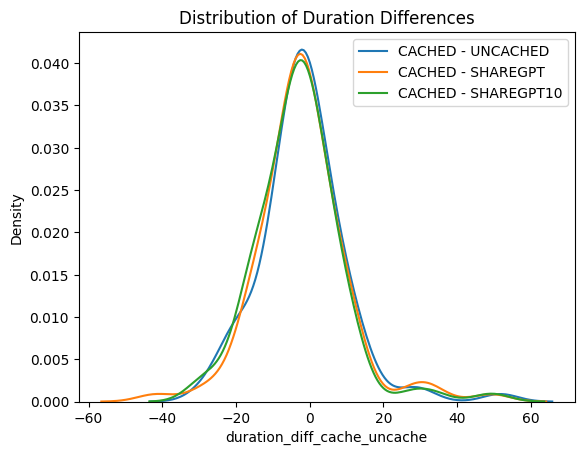

In [192]:
sns.kdeplot(pivot_df['duration_diff_cache_uncache'].dropna(), label='CACHED - UNCACHED')
sns.kdeplot(pivot_df['duration_diff_cache_sharegpt'].dropna(), label='CACHED - SHAREGPT')
sns.kdeplot(pivot_df['duration_diff_cache_sharegpt10'].dropna(), label='CACHED - SHAREGPT10')
plt.legend()
plt.title("Distribution of Duration Differences")
plt.show()


In [193]:
pivot_df.dropna(inplace=True, axis=0)
# pivot_df.info()
pivot_df.to_csv('pivot_df_cleaned.csv', index=False)
pivot_df.to_json('pivot_df_cleaned.json', orient='records', lines=True)
for task in ["DBBENCH", "M2W", "WEBSHOP"]:
    idx_set = set(pivot_df[pivot_df['task'] == task]['index'])
    if task == "DBBENCH":
        common_DB = [d for d in DBBENCH_RUNS_CACHED if d.get('index') in idx_set]
    elif task == "M2W":
        common_M2W = [d for d in M2W_RUNS_CACHED if d.get('index') in idx_set]
    elif task == "WEBSHOP":
        common_WEBSHOP = [d for d in WEBSHOP_RUNS_CACHED if d.get('index') in idx_set]
    else:
        raise ValueError(f"Unknown task: {task}")

lists_of_tasks = {
    "DBBENCH": common_DB,
    "M2W": common_M2W,
    "WEBSHOP": common_WEBSHOP
}
for name, records in lists_of_tasks.items():
    fname = f"output_{name}_cleaned.jsonl"
    with open(fname, "w", encoding="utf-8") as out:
        for rec in records:
            out.write(json.dumps(rec) + "\n")
    print(f"Wrote {len(records)} records → {fname}")

Wrote 0 records → output_DBBENCH_cleaned.jsonl
Wrote 35 records → output_M2W_cleaned.jsonl
Wrote 18 records → output_WEBSHOP_cleaned.jsonl


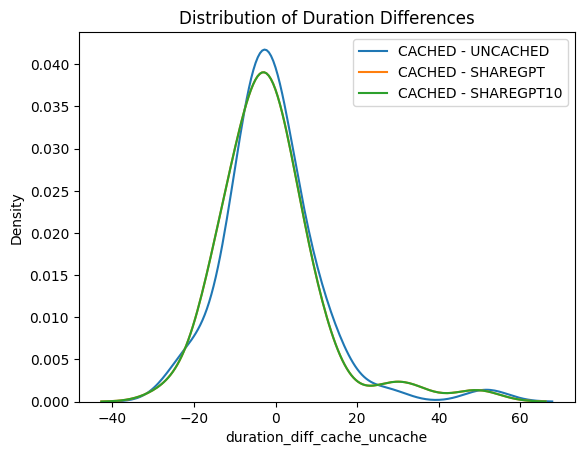

In [194]:
sns.kdeplot(pivot_df['duration_diff_cache_uncache'].dropna(), label='CACHED - UNCACHED')
sns.kdeplot(pivot_df['duration_diff_cache_sharegpt'].dropna(), label='CACHED - SHAREGPT')
sns.kdeplot(pivot_df['duration_diff_cache_sharegpt10'].dropna(), label='CACHED - SHAREGPT10')
plt.legend()
plt.title("Distribution of Duration Differences")
plt.show()


In [195]:
pivot_df['duration_diff_cache_sharegpt'].dropna()

15     -7.294
16    -18.069
18      3.095
26     -2.763
28     -0.032
39     -3.798
49     11.722
50     -5.180
52      9.920
54    -11.819
55     -7.380
56     12.128
68      2.959
69      3.257
71     -4.176
76     -3.126
81      1.548
85    -16.317
96     -0.766
100   -14.873
107    -4.072
121    -7.319
122    -2.445
124   -12.117
126     9.487
128   -13.680
130     1.777
131     2.521
147     4.450
148    49.318
151    -4.340
155    27.262
157    -2.700
158     3.954
160    -4.404
168   -11.386
174    -6.843
180     5.132
184     7.755
186    -1.234
201     1.757
202    -4.353
251    33.135
252    -3.302
254    -8.635
256     0.409
261    -3.329
275   -25.872
282    -3.874
285   -12.882
291   -13.952
303   -13.798
305   -10.437
Name: duration_diff_cache_sharegpt, dtype: float64

In [154]:
# Good with Caching
good_cache = pivot_df[pivot_df['duration_diff_cache_uncache'] < 0][['index', 'task', 'duration_diff_cache_uncache']]

# Bad with Caching
bad_cache = pivot_df[pivot_df['duration_diff_cache_uncache'] > 0][['index', 'task', 'duration_diff_cache_uncache']]

# Good with ShareGPT10 (either compared to cache or uncached)
good_sharegpt10 = pivot_df[
    (pivot_df['duration_diff_cache_sharegpt10'] < 0) |
    (pivot_df['duration_diff_uncache_sharegpt10'] < 0)
][['index', 'task', 'duration_diff_cache_sharegpt10', 'duration_diff_uncache_sharegpt10']]

# Bad with ShareGPT10
bad_sharegpt10 = pivot_df[
    (pivot_df['duration_diff_cache_sharegpt10'] > 0) |
    (pivot_df['duration_diff_uncache_sharegpt10'] > 0)
][['index', 'task', 'duration_diff_cache_sharegpt10', 'duration_diff_uncache_sharegpt10']]



In [155]:
good_sharegpt10

run_type,index,task,duration_diff_cache_sharegpt10,duration_diff_uncache_sharegpt10
15,7,M2W,-7.294,-2.587
16,7,WEBSHOP,-18.069,-10.457
26,11,M2W,-2.763,2.182
28,12,M2W,-0.032,2.477
39,17,M2W,-3.798,4.813
49,22,M2W,11.722,-1.405
50,23,M2W,-5.180,-3.981
52,24,M2W,9.920,-4.681
54,25,M2W,-11.819,7.899
55,25,WEBSHOP,-7.380,-11.787


In [ ]:
BASE_DIR = "/home/ubuntu/vishalk/litellm/AgentBench/data/"
DBBENCH = 'dbbench/'
WEBSHOP = 'webshop'
OSS = 'os-std'
M2W = 'mind2web'

{'index': 295,
 'error': None,
 'info': None,
 'output': {'index': 295,
  'status': 'completed',
  'result': {'answer': "[('be5ef7cf6f048e1e62c4c0c3abda38c9',)]",
   'type': 'UPDATE',
   'error': ''},
  'history': [{'role': 'user',
    'content': '\nI will ask you a question, then you should help me operate a MySQL database with SQL to answer the question.\nYou have to explain the problem and your solution to me and write down your thoughts.\nAfter thinking and explaining thoroughly, every round you can choose to operate or to answer.\nyour operation should be like this:\nAction: Operation\n```sql\nSELECT * FROM table WHERE condition;\n```\nYou MUST put SQL in markdown format without any other comments. Your SQL should be in one line.\nEvery time you can only execute one SQL statement. I will only execute the statement in the first SQL code block. Every time you write a SQL, I will execute it for you and give you the output.\nIf you are done operating, and you want to commit your final

In [43]:
import pandas as pd

combined_df = pd.concat([
    DBBENCH_RUNS_CACHED_DF_COMPLETED,
    M2W_RUNS_CACHED_DF_COMPLETED,
    WEBSHOP_RUNS_CACHED_DF_COMPLETED,
    DBBENCH_RUNS_UNCACHED_DF_COMPLETED,
    M2W_RUNS_UNCACHED_DF_COMPLETED,
    WEBSHOP_RUNS_UNCACHED_DF_COMPLETED,
    DBBENCH_RUNS_SHAREGPT_DF_COMPLETED,
    M2W_RUNS_SHAREGPTD_DF_COMPLETED,
    WEBSHOP_RUNS_SHAREGPT_DF_COMPLETED,
    DBBENCH_RUNS_SHAREGPT10_DF_COMPLETED,
    M2W_RUNS_SHAREGPT10_DF_COMPLETED,
    WEBSHOP_RUNS_SHAREGPT10_DF_COMPLETED
], ignore_index=True)


In [44]:
combined_df.describe()

,index,start_time,end_time,duration,time_difference
count,730.000000,730,730,730.000000,730.000000
mean,86.432877,2025-04-22 10:49:25.257534208,2025-04-22 10:49:50.026027520,24.774499,24.768493
min,0.000000,2025-04-20 19:04:21,2025-04-20 19:05:11,4.390000,4.000000
25%,34.000000,2025-04-20 19:50:50,2025-04-20 19:51:39,16.106500,16.000000
50%,73.000000,2025-04-21 20:20:13,2025-04-21 20:20:28.500000,22.109500,22.000000
75%,128.500000,2025-04-23 22:15:30,2025-04-23 22:15:48.500000,29.417750,29.000000
max,299.000000,2025-04-24 21:18:03,2025-04-24 21:18:16,199.896000,200.000000
std,65.534221,NaN,NaN,15.327387,15.331449


In [ ]:
combined_df['task'] = combined_df['source'].apply(lambda x: x.split('_')[0])
combined_df['run_type'] = combined_df['source'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Step 2: Pivot so that each row represents one index, with durations per run_type
pivot_df = combined_df.pivot_table(
    index=['index', 'task'],
    columns='run_type',
    values='duration'
).reset_index()

# Step 3: Compute pairwise duration differences
pivot_df['duration_diff_cache_uncache'] = pivot_df['CACHED'] - pivot_df['UNCACHED']
pivot_df['duration_diff_cache_sharegpt'] = pivot_df['CACHED'] - pivot_df['SHAREGPT']
pivot_df['duration_diff_cache_sharegpt10'] = pivot_df['CACHED'] - pivot_df['SHAREGPT10']
pivot_df['duration_diff_uncache_sharegpt'] = pivot_df['UNCACHED'] - pivot_df['SHAREGPT']
pivot_df['duration_diff_uncache_sharegpt10'] = pivot_df['UNCACHED'] - pivot_df['SHAREGPT10']
pivot_df['duration_diff_sharegpt_sharegpt10'] = pivot_df['SHAREGPT'] - pivot_df['SHAREGPT10']

pivot_df

run_type,index,task,CACHED,SHAREGPT,SHAREGPT10,UNCACHED,duration_diff_cache_uncache,duration_diff_cache_sharegpt,duration_diff_cache_sharegpt10,duration_diff_uncache_sharegpt,duration_diff_uncache_sharegpt10,duration_diff_sharegpt_sharegpt10
0,0,DBBENCH,NaN,NaN,NaN,11.563,NaN,NaN,NaN,NaN,NaN,NaN
1,0,M2W,8.613,21.728,21.728,NaN,NaN,-13.115,-13.115,NaN,NaN,0.0
2,0,WEBSHOP,35.767,NaN,NaN,25.499,10.268,NaN,NaN,NaN,NaN,NaN
3,1,M2W,16.811,NaN,NaN,11.854,4.957,NaN,NaN,NaN,NaN,NaN
4,1,WEBSHOP,14.070,17.464,17.464,NaN,NaN,-3.394,-3.394,NaN,NaN,0.0


343

In [26]:
summary_df = combined_df.groupby('source')['duration'].agg(['count', 'mean', 'min', 'max']).reset_index()
summary_df.columns = ['Source', 'Run Count', 'Avg Duration', 'Min Duration', 'Max Duration']


In [27]:
summary_df

,Source,Run Count,Avg Duration,Min Duration,Max Duration
0,DBBENCH_CACHED,36,23.947472,4.390,135.996
1,DBBENCH_SHAREGPT,40,35.276200,4.930,199.896
2,DBBENCH_SHAREGPT10,39,20.802128,4.656,65.278
3,DBBENCH_UNCACHED,42,20.875119,4.526,83.315
4,M2W_CACHED,53,17.867604,8.613,43.127
5,M2W_SHAREGPT,57,19.651053,9.807,35.655
6,M2W_SHAREGPT10,57,19.651053,9.807,35.655
7,M2W_UNCACHED,50,20.381240,11.621,43.554
8,WEBSHOP_CACHED,91,24.867352,11.764,72.181
9,WEBSHOP_SHAREGPT,87,29.291563,13.064,73.000


In [28]:
# 1. Tag and keep only relevant columns
def tag_and_reduce(df, tag):
    df = df.copy()
    df['source'] = tag
    return df[['index', 'duration', 'source']]

cached = pd.concat([
    DBBENCH_RUNS_CACHED_DF_COMPLETED,
    M2W_RUNS_CACHED_DF_COMPLETED,
    WEBSHOP_RUNS_CACHED_DF_COMPLETED
])

uncached = pd.concat([
    DBBENCH_RUNS_UNCACHED_DF_COMPLETED,
    M2W_RUNS_UNCACHED_DF_COMPLETED,
    WEBSHOP_RUNS_UNCACHED_DF_COMPLETED
])

cached = tag_and_reduce(cached, 'cached')
uncached = tag_and_reduce(uncached, 'uncached')

# 2. Merge by index to compare durations
merged = pd.merge(uncached, cached, on='index', suffixes=('_uncached', '_cached'))

# 3. Compute benefit
merged['duration_saved'] = merged['duration_uncached'] - merged['duration_cached']

# 4. Sort to find the biggest benefit
benefit_df = merged.sort_values(by='duration_saved', ascending=False)


In [29]:
benefit_df

,index,duration_uncached,source_uncached,duration_cached,source_cached,duration_saved
25,58,83.315,uncached,14.288,cached,69.027
26,58,83.315,uncached,26.661,cached,56.654
40,126,45.577,uncached,13.071,cached,32.506
18,30,36.499,uncached,7.316,cached,29.183
24,54,45.888,uncached,20.407,cached,25.481
...,...,...,...,...,...,...
95,74,17.230,uncached,54.032,cached,-36.802
178,182,34.879,uncached,73.344,cached,-38.465
147,71,20.484,uncached,72.181,cached,-51.697
91,71,19.116,uncached,72.181,cached,-53.065


In [30]:
# 1. Add benchmark identifiers before tagging
def tag_and_reduce(df, benchmark_name, source_type):
    df = df.copy()
    df['benchmark'] = benchmark_name
    # df['source'] = source_type  # 'cached' or 'uncached'
    return df[['index', 'duration', 'status', 'benchmark']]

# 2. Tag all sources
cached_df = pd.concat([
    tag_and_reduce(DBBENCH_RUNS_CACHED_DF, 'DBBENCH', 'cached'),
    tag_and_reduce(M2W_RUNS_CACHED_DF, 'M2W', 'cached'),
    tag_and_reduce(WEBSHOP_RUNS_CACHED_DF, 'WEBSHOP', 'cached')
])

uncached_df = pd.concat([
    tag_and_reduce(DBBENCH_RUNS_UNCACHED_DF, 'DBBENCH', 'uncached'),
    tag_and_reduce(M2W_RUNS_UNCACHED_DF, 'M2W', 'uncached'),
    tag_and_reduce(WEBSHOP_RUNS_UNCACHED_DF, 'WEBSHOP', 'uncached')
])

# 3. Rename for clarity before merge
cached_df = cached_df.rename(columns={
    'duration': 'duration_cached',
    'status': 'status_cached'
})

uncached_df = uncached_df.rename(columns={
    'duration': 'duration_uncached',
    'status': 'status_uncached'
})

# 4. Merge on index and benchmark — this ensures you're comparing same-task from same dataset
merged_df = pd.merge(
    uncached_df,
    cached_df,
    on=['index', 'benchmark'],
    suffixes=('_uncached', '_cached')
)

# 5. Calculate duration benefit
merged_df['duration_saved'] = merged_df['duration_uncached'] - merged_df['duration_cached']


In [34]:
merged_df = merged_df[ (merged_df["status_uncached"] == "completed") & (merged_df["status_cached"] == "completed") ]
merged_df.head(20)

,index,duration_uncached,status_uncached,benchmark,duration_cached,status_cached,duration_saved
7,7,14.662,completed,DBBENCH,12.945,completed,1.717
11,11,4.814,completed,DBBENCH,4.390,completed,0.424
16,16,14.427,completed,DBBENCH,9.692,completed,4.735
30,30,36.499,completed,DBBENCH,7.316,completed,29.183
67,67,48.367,completed,DBBENCH,57.884,completed,-9.517
79,79,12.552,completed,DBBENCH,43.121,completed,-30.569
82,82,9.452,completed,DBBENCH,10.076,completed,-0.624
90,90,43.406,completed,DBBENCH,25.361,completed,18.045
94,94,25.080,completed,DBBENCH,30.673,completed,-5.593
258,258,14.117,completed,DBBENCH,12.109,completed,2.008
